### How it works:

Data is cleaned elsewhere and saved using ```pandas.DataFrame.to_pickle('file_name.pkl')``` and are loaded in here using ```pandas.DataFrame.read_pickle('file_name.pkl')```. Values are then scaled and plotted as needed. 

Universal plot settings, such as font and the color cycler, are set in 2nd cell below this.

I will want to use .pgf to import the plots into LaTeX: https://riptutorial.com/matplotlib/example/10066/saving-and-exporting-plots-that-use-tex

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [3]:
#Set custom default colors
custom_cycler = (cycler(color=['#098ec3', #blue
                               '#ec8013', #orange
                               '#53b234', #green
                               '#df2020', #red
                               '#8463e9', #indigo
                               '#ccac66', #sand
                               '#ff8680', #pink
                               '#c170db', #violet
                               '#acd926', #yellowgreen
                               '#00CED1', #cyan
                               '#ec4913', #redorange
                               '#805e00' #brown
                              ]) 
                )

# Change style defaults
plt.rc('text', usetex=True) # Allows LaTeX formatting with r'Formatted Text'
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']}) # Changes font to default LaTeX fount
plt.rcParams['axes.prop_cycle'] = custom_cycler # Sets plot color cycler to the cycle defined above

## Define filepath

This is the filepath from the current directory to the directory where your data is stored. This directory should contain the subdirectories: csv, analytics, pickle_dataframes, figures

In [12]:
# Define filepath
wo_ions_version = 'wo_ions/old_output' # Mullikin results
w_ions_version = 'w_ions/22_01_07_fit'

## 2test_fig2.pro: 

This code is for the model and network used in my thesis

```
f2data = READ_CSV('csv\bO3.csv',N_TABLE_HEADER=1)

initialO2 = 2*5.7E22
flux = 2.33e14

set_plot, 'WIN'

expX = [4.709604,$
  13.496563,$
  50.07993,$
  146.55681,$
  465.09692,$
  2581.1648]

expY = [0.055385794,$
  0.15238622,$
  0.52023816,$
  1.062651,$
  1.4836915,$
  1.6182984]

expY = expY*15
expX = expX*flux

f2data.field1 = f2data.field1
f2data.field2 = 3*(f2data.field2/initialO2)*100

;DEVICE, FILENAME='f2_newcode_newnetwork.eps', DECOMPOSED=1, /ENCAPSULATED
DEVICE, DECOMPOSED=1

plot, f2data.field1,$
  f2data.field2,$
  /XLOG,$
  /YLOG,$
  XRANGE=[1e15,1e18],$
  YRANGE=[0.8,30],$
  xtitle='Fluence (photons/cm!E2!N)',$
  ytitle='[O!D3!N]/[initial O!D2!N] x 100 %',$
  ;      title='O!D3!N Production During O!D2!N Irradiation',$
  ystyle=1,$
  charsize=1.8,$
  charthick=3,$
  xthick=3,$
  ythick=3,$
  /NODATA

loadct, 40

oplot, expX,$
  expY,$
  PSYM=-5,$
  COLOR=250,$
  thick=5,$
  symsize=1.5

oplot, f2data.field1,$
  f2data.field2,$
  COLOR=100,$
  thick=5

legend,['Experiment','Model'],psym=[-5,0],number=1,/bottom,/right,colors=[250,100],box=0,charsize=1.8,charthick=3,thick=5,pspacing=1          ; plot two symbols, not one

;device, /close

END
```

## figure_2_DO_NOT_MODIFY.pro

This code is for the model and network published in Mullikin et al.

```
time = bO3.field1
totalO3 = bO3.field2 + gO3.field2
totalO2 = bO2.field2 + gO2.field2

last = N_elements(totalO3)

flux = 2.33e14

set_plot, 'WIN'

O3t = [4.709604,$
13.496563,$
50.07993,$
146.55681,$
465.09692,$
2581.1648]

O3 = [0.055385794,$
0.15238622,$
0.52023816,$
1.062651,$
1.4836915,$
1.6182984]

O3 = O3*(24.0/1.6182984)
O3t = O3t*2.2E14


;DEVICE, FILENAME='f2.eps', DECOMPOSED=0, /ENCAPSULATED
DEVICE, DECOMPOSED=1


plot, time*flux,$
 ;     100*(totalO3[63:*]*(0.24/totalO3[last-1])),$
      100*(totalO3/totalO2[0]),$
      /XLOG,$
      /YLOG,$
      XRANGE=[1e15,1e18],$
      YRANGE=[0.8,30],$
      xtitle='Fluence (photons/cm!E2!N)',$
      ytitle='[O!D3!N]/[initial O!D2!N] x 100 %',$
;      title='O!D3!N Production During O!D2!N Irradiation',$
      ystyle=1,$
      charsize=1.8,$
      charthick=3,$
      xthick=3,$
      ythick=3,$
      /NODATA

loadct, 40

      
oplot, O3t,$
       O3,$
       PSYM=-5,$
       COLOR=250,$
       thick=5,$
       symsize=1.5
       
oplot, time*flux,$
;       100*(totalO3[63:*]*(0.24/totalO3[last-1])),$
       100*(totalO3/totalO2[0]),$
       COLOR=100,$
       thick=5

legend,['Experiment','Model'],psym=[-5,0],number=1,/bottom,/right,colors=[250,100],box=0,charsize=1.8,charthick=3,thick=5,pspacing=1          ; plot two symbols, not one
      
;device, /close

END
```

## Plotting comparison to Gerakines et al.

This cell recreated the plotting scripts from 2test_fig2.pro (New code) and figure_2_DO_NOT_MODIFY.pro (published data) to compare the fit of the current run to the previously published fit and the experimental data

C:\Users\darne\AppData\Local\Temp/ipykernel_15164/1616203975.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data_woions["Fluence"] = model_data_woions["Fluence"]
C:\Users\darne\AppData\Local\Temp/ipykernel_15164/1616203975.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data_woions["bO3"] = (model_data_woions['total_O3'] / model_data_woions.at[0,'total_O2']) * 100
C:\Users\darne\AppData\Local\Temp/ipykernel_15164/1616203975.py:45: SettingWithCopyWarning: 
A value is trying to be set o

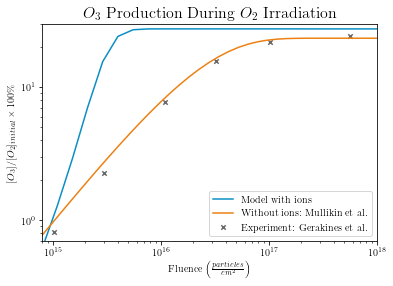

In [4]:
# Load in data
woions_df = pd.read_pickle(wo_ions_version + '/pickle_dataframes/csv_dataframe.pkl')
wions_df = pd.read_pickle(w_ions_version + '/pickle_dataframes/csv_dataframe.pkl')

# Set constants: Variables to be taken from model.inp
# ICE_AREA = 1.0e-20 # cm2
# ICE_THICK = 1.0e-4 # cm
# ICE_DENSITY = 5.7e22 # molecules/cm3 Called RHO_ICE in model.inp
# PHI_EXP = 1.0e15

initialO2 = 2*5.7E22
flux = 2.33e14

# Calculate initial O2 
# initialO2 = ICE_DENSITY * ICE_AREA * ICE_THICK # # of initial O2 molecules
# initial_oxygen = 2 * ICE_DENSITY * ICE_AREA * ICE_THICK # # of initial O atoms (in O2 molecules)

# Isolate data of interest
model_data_woions = woions_df[['Fluence', 'total_O3', 'total_O2']]
model_data_wions = wions_df[['Fluence', 'bO3']]

exp_data = pd.DataFrame({'expX': [4.709604,
                                      13.496563,
                                      50.07993,
                                      146.55681,
                                      465.09692,
                                      2581.1648],
                             'expY': [0.055385794,
                                      0.15238622,
                                      0.52023816,
                                      1.062651,
                                      1.4836915,
                                      1.6182984]})

# Scale modifications
# exp_data["expY"] = exp_data["expY"] * 15 # 15 is an artifact of the digitization of the gerakines data. I can confirm with the plot in the paper that the dta is plotted correctly.
# exp_data["expX"] = exp_data["expX"] * flux
exp_data["expY"] = exp_data["expY"] * (24.0 / 1.6182984) # Scaling factor used in figure_2_DO_NOT_MODIFY.pro
exp_data["expX"] = exp_data["expX"] * 2.2E14 # Scaling factor used in figure_2_DO_NOT_MODIFY.pro

model_data_woions["Fluence"] = model_data_woions["Fluence"]
#model_data_woions["bO3"] = 3 * (model_data_woions["bO3"] / initialO2) * 100
model_data_woions["bO3"] = (model_data_woions['total_O3'] / model_data_woions.at[0,'total_O2']) * 100

model_data_wions["Fluence"] = model_data_wions["Fluence"]
model_data_wions["bO3"] = 3 * (model_data_wions["bO3"] / initialO2) * 100

#model_data.head()
# Create figure

# Add data to figure
ax = model_data_wions.plot(x = 'Fluence', y = 'bO3', label = 'Model with ions')
model_data_woions.plot(ax = ax, x = 'Fluence', y = 'bO3', label = 'Without ions: Mullikin et al.')
exp_data.plot.scatter(ax = ax, x = 'expX', y = 'expY', marker="x", c='dimgrey', label = 'Experiment: Gerakines et al.') #  c='#53b234'

# Add plot elements
plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.xlim([8e14,1e18])
plt.ylim([0.7,30])

plt.xlabel(r'Fluence $\left( \frac{particles}{cm^2} \right)$')
plt.ylabel(r'$[O_3]/[O_2]_{initial} \times 100 \%$')
plt.title(r'$O_3$ Production During $O_2$ Irradiation',
          fontsize=16)

# Show plot
# plt.savefig(w_ions_version + '/figures/f2.png')
# plt.savefig(w_ions_version + '/figures/f2.pgf')
# plt.savefig(w_ions_version + '/figures/f2.eps')
plt.show()

## Percent Ion

Plots the percentage of ionic species in the model with respect to fluence

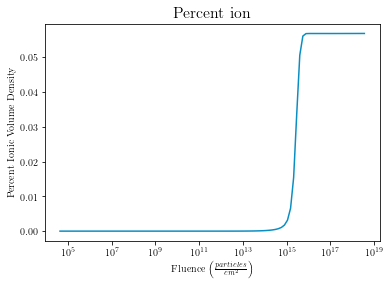

In [5]:
# Load in data
csv_df = pd.read_pickle(w_ions_version + '/pickle_dataframes/csv_dataframe.pkl')

# Create figure
#fig = plt.figure()

# Add the data
csv_df.plot(x = 'Fluence', y = 'Percent Ion', legend=None)

# Add plot elements 
plt.xscale("log")
#plt.yscale("log")

# plt.xlim([1e14,1e17])
# #plt.ylim([0.8,30])

plt.xlabel(r'Fluence $\left( \frac{particles}{cm^2} \right)$')
plt.ylabel(r'Percent Ionic Volume Density')
plt.title(r"Percent ion", fontsize=16)

# Show and save plot
# plt.savefig(w_ions_version + '/figures/percent_ion.png')
# plt.savefig(w_ions_version + '/figures/percent_ion.pgf')
# plt.savefig(w_ions_version + '/figures/percent_ion.eps')
plt.show()

## Ion Abundances

Plots the percentage of ionic species in the model with respect to fluence

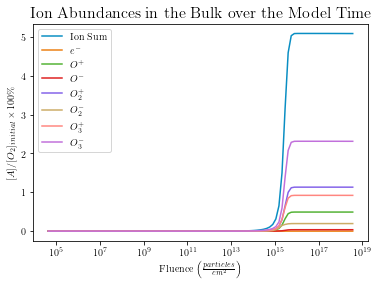

In [6]:
# Load in data
csv_df = pd.read_pickle(w_ions_version + '/pickle_dataframes/csv_dataframe.pkl')
initial_O2 = csv_df.at[0,'bO2']

# Create figure
#fig = plt.figure(figsize=[12.8, 9.6])

# Set legend labels list
plot_ion_list = ['Ion volume density', 'be-', 'bO+', 'bO-', 'bO2+', 'bO2-', 'bO3+', 'bO3-']
plot_ion_labels = [r'Ion Sum', r'$e^-$', r'$O^+$', r'$O^-$', r'$O_2^+$', r'$O_2^-$', r'$O_3^+$', r'$O_3^-$']

# Scale modifications
i=0
while i < len(plot_ion_list):
    #csv_df[plot_ion_list[i]] = csv_df[plot_ion_list[i]] / csv_df['Total volume density']
    csv_df[plot_ion_list[i]] = csv_df[plot_ion_list[i]] * 100 / initial_O2
    i += 1

# Add the data
#ax = csv_df.plot(x = 'Fluence', y = 'Percent Ion', legend = 'All ions')
csv_df.plot(x = 'Fluence', y = plot_ion_list[:], label = plot_ion_labels[:])

# Add plot elements
plt.legend()
#plt.yscale("log")
plt.xscale("log")

# plt.xlim([1e14,1e17])
# #plt.ylim([1e-5,1e1])

plt.xlabel(r'Fluence $\left( \frac{particles}{cm^2} \right)$')
plt.ylabel(r'$[A]/[O_2]_{initial} \times 100 \%$')
plt.title(r'Ion Abundances in the Bulk over the Model Time',
          fontsize=16)

# Show plot
# plt.savefig(w_ions_version + '/figures/ion_abundance.png')
# plt.savefig(w_ions_version + '/figures/ion_abundance.pgf')
#plt.savefig(w_ions_version + '/figures/ion_abundance.eps')
plt.show()

## Reaction Contribution

Reaction labels and reaction types must be confirmed after new runs! (Likely only after modifying input files, but don't assume.) Because the code assigns reaction numbers, there is no guarentee that these labels are current. 

In [7]:
# Labels for the numberes reactions

# Highest reaction number + 1 in the spc_list[i]_rxn_dataframe.pkl
last_rxn = 186

Rxn_label = pd.DataFrame({'Rxn': list(range(0,last_rxn,1)),
                          'Label': [(r'Add reaction ' + str(i)) for i in range(last_rxn)],
                          'Type': [0 for i in range(last_rxn)]
                          })

# Rxn_label.at[0,'Label'] = r'$ \rightarrow $' #
# Rxn_label.at[0,'Type'] = 0 #

#Types:
# 0 = Neutral-Neutral reactions
# 1 = ion-neutral reactions
# 2 = ion recombination reactions
# 3 = photoprocesses
# 4 = suprathermal/quenching

Rxn_label.at[56,'Label'] = r'$2 O \rightarrow O_2$' #56
Rxn_label.at[56,'Type'] = 0 #56
Rxn_label.at[58,'Label'] = r'$O + e^- \rightarrow O^-$' #58
Rxn_label.at[58,'Type'] = 1 #58
Rxn_label.at[59,'Label'] = r'$O + O^- \rightarrow O_2^-$' #59
Rxn_label.at[59,'Type'] = 1 #59
Rxn_label.at[60,'Label'] = r'$O + O_2^- \rightarrow O_3^-$' #60
Rxn_label.at[60,'Type'] = 1 #
Rxn_label.at[61,'Label'] = r'$O^+ + e^- \rightarrow O^*$' #61
Rxn_label.at[61,'Type'] = 1 #
Rxn_label.at[62,'Label'] = r'$O^+ + O^- \rightarrow O_2^*$' #62
Rxn_label.at[62,'Type'] = 2 #
Rxn_label.at[63,'Label'] = r'$O^+ + O^- \rightarrow 2 O^*$' #63
Rxn_label.at[63,'Type'] = 2 #
Rxn_label.at[64,'Label'] = r'$O^+ + O_2 \rightarrow O_2^+ + O$' #64
Rxn_label.at[64,'Type'] = 1 #
Rxn_label.at[65,'Label'] = r'$O^+ + O_2^- \rightarrow O_3^*$' #65
Rxn_label.at[65,'Type'] = 2 #
Rxn_label.at[66,'Label'] = r'$O^+ + O_2^- \rightarrow O^* + O_2^*$' #66
Rxn_label.at[66,'Type'] = 2 #
Rxn_label.at[67,'Label'] = r'$O^+ + O_3^- \rightarrow O^* + O_3^*$' #67
Rxn_label.at[67,'Type'] = 2 #
Rxn_label.at[68,'Label'] = r'$O^+ + O_3^- \rightarrow 2 O_2^*$' #68
Rxn_label.at[68,'Type'] = 2 #
Rxn_label.at[69,'Label'] = r'$O_2 + e^- \rightarrow O_2^-$' #69
Rxn_label.at[69,'Type'] = 1 #
Rxn_label.at[70,'Label'] = r'$O_2 + O^- \rightarrow O_3^-$' #70
Rxn_label.at[70,'Type'] = 1 #
Rxn_label.at[71,'Label'] = r'$O_2^+ + e^- \rightarrow O_2^*$' #71
Rxn_label.at[71,'Type'] = 2 #
Rxn_label.at[72,'Label'] = r'$O_2^+ + e^- \rightarrow 2 O^*$' #72
Rxn_label.at[72,'Type'] = 2 #
Rxn_label.at[73,'Label'] = r'$O_2^+ + O^- \rightarrow O_3^*$' #73
Rxn_label.at[73,'Type'] = 2 #
Rxn_label.at[74,'Label'] = r'$O_2^+ + O^- \rightarrow O_2^* + O^*$' #74
Rxn_label.at[74,'Type'] = 2 #
Rxn_label.at[75,'Label'] = r'$O_2^+ + O_2 \rightarrow O_3^+ + O$' #75
Rxn_label.at[75,'Type'] = 1 #
Rxn_label.at[76,'Label'] = r'$O_2^+ + O_2^- \rightarrow O_3^* + O^*$' #76
Rxn_label.at[76,'Type'] = 2 #
Rxn_label.at[77,'Label'] = r'$O_2^+ + O_2^- \rightarrow 2 O_2^*$' #77
Rxn_label.at[77,'Type'] = 2 #
Rxn_label.at[78,'Label'] = r'$O_2^+ + O_3^- \rightarrow O_2^* + O_3^*$' #78
Rxn_label.at[78,'Type'] = 2 #
Rxn_label.at[79,'Label'] = r'$O_2^+ + O_3^- \rightarrow 2 O_2^* + O^*$' #79
Rxn_label.at[79,'Type'] = 2 #
Rxn_label.at[80,'Label'] = r'$O_2^+ + O_3^- \rightarrow O_3^* + 2 O^*$' #80
Rxn_label.at[80,'Type'] = 2 #
Rxn_label.at[81,'Label'] = r'$O_3 + e^- \rightarrow O_3^-$' #81
Rxn_label.at[81,'Type'] = 1 #
Rxn_label.at[82,'Label'] = r'$O_3 + O^- \rightarrow O_2 + O_2^-$' #82
Rxn_label.at[82,'Type'] = 1 #
Rxn_label.at[83,'Label'] = r'$O_3 + O_2^- \rightarrow O_2 + O_3^-$' #83
Rxn_label.at[83,'Type'] = 1 #
Rxn_label.at[84,'Label'] = r'$O_3 + O_3^+ \rightarrow 2 O_2 + O_2^+$' #84
Rxn_label.at[84,'Type'] = 1 #
Rxn_label.at[85,'Label'] = r'$O_3^- + O^- \rightarrow 2 O_2^-$' #85
Rxn_label.at[85,'Type'] = 2 #
Rxn_label.at[86,'Label'] = r'$O_3^+ + e^- \rightarrow O_3^*$' #86
Rxn_label.at[86,'Type'] = 2 #
Rxn_label.at[87,'Label'] = r'$O_3^+ + e^- \rightarrow O_2^* + O^*$' #87
Rxn_label.at[87,'Type'] = 2 #
Rxn_label.at[88,'Label'] = r'$O_3^+ + O^- \rightarrow O^* + O_3^*$' #88
Rxn_label.at[88,'Type'] = 2 #
Rxn_label.at[89,'Label'] = r'$O_3^+ + O^- \rightarrow 2 O_2^*$' #89
Rxn_label.at[89,'Type'] = 2 #
Rxn_label.at[90,'Label'] = r'$O_3^+ + O_2 \rightarrow O_2^+ + O_3$' #90
Rxn_label.at[90,'Type'] = 1 #
Rxn_label.at[91,'Label'] = r'$O_3^+ + O_2 \rightarrow O_3^+ + O_2$' #91
Rxn_label.at[91,'Type'] = 1 #
Rxn_label.at[92,'Label'] = r'$O_3^+ + O_2 \rightarrow 2 O_2 + O^+$' #92
Rxn_label.at[92,'Type'] = 1 #
Rxn_label.at[93,'Label'] = r'$O_3^+ + O_2^- \rightarrow O_3^* + O_2^*$' #93
Rxn_label.at[93,'Type'] = 2 #
Rxn_label.at[94,'Label'] = r'$O_3^+ + O_2^- \rightarrow 2 O_2^* + O^*$' #94
Rxn_label.at[94,'Type'] = 2 #
Rxn_label.at[95,'Label'] = r'$O_3^+ + O_2^- \rightarrow O_3^* + 2 O^*$' #95
Rxn_label.at[95,'Type'] = 2 #
Rxn_label.at[96,'Label'] = r'$O_3^+ + O_3^- \rightarrow 2 O_3^*$' #96
Rxn_label.at[96,'Type'] = 2 #
Rxn_label.at[97,'Label'] = r'$O_3^+ + O_3^- \rightarrow O_3^* + O_2^* + O^*$' #97
Rxn_label.at[97,'Type'] = 2 #
Rxn_label.at[98,'Label'] = r'$O_3^+ + O_3^- \rightarrow 3 O_2^*$' #98
Rxn_label.at[98,'Type'] = 2 #
Rxn_label.at[101,'Label'] = r'$O^* + O \rightarrow O_2$' #101
Rxn_label.at[101,'Type'] = 4 #
Rxn_label.at[102,'Label'] = r'$O_3^* + O_3 \rightarrow 3 O_2$' #102
Rxn_label.at[102,'Type'] = 4 #
Rxn_label.at[117,'Label'] = r'$O^* + O \rightarrow 2 O$' #117
Rxn_label.at[117,'Type'] = 4 #
Rxn_label.at[118,'Label'] = r'$O^* + O \rightarrow O_2^*$' #118
Rxn_label.at[118,'Type'] = 4 #
Rxn_label.at[121,'Label'] = r'$O^* + O_2 \rightarrow O_3^*$' #121
Rxn_label.at[121,'Type'] = 4 #
Rxn_label.at[123,'Label'] = r'$O^* + O_2 \rightarrow O + O_2$' #123
Rxn_label.at[123,'Type'] = 4 #
Rxn_label.at[125,'Label'] = r'$O + O_3 \rightarrow 2 O_2$' #125
Rxn_label.at[125,'Type'] = 0 #
Rxn_label.at[127,'Label'] = r'$O^* + O_3 \rightarrow 2 O_2$' #127
Rxn_label.at[127,'Type'] = 4 #
Rxn_label.at[129,'Label'] = r'$O_2^* + O \rightarrow O_3^*$' #129
Rxn_label.at[129,'Type'] = 4 #
Rxn_label.at[131,'Label'] = r'$O_2^* + O \rightarrow O_2 + O$' #131
Rxn_label.at[131,'Type'] = 4 #
Rxn_label.at[133,'Label'] = r'$O_2^* + O_2 \rightarrow 2 O_2$' #133
Rxn_label.at[133,'Type'] = 4 #
Rxn_label.at[135,'Label'] = r'$O_2^* + O_3 \rightarrow 2 O_2 + O$' #135
Rxn_label.at[135,'Type'] = 4 #
Rxn_label.at[137,'Label'] = r'$2 O^* \rightarrow 2 O$' #137
Rxn_label.at[137,'Type'] = 4 #
Rxn_label.at[138,'Label'] = r'$O^* + O \rightarrow O_2^*$' #138
Rxn_label.at[138,'Type'] = 4 #
Rxn_label.at[143,'Label'] = r'$O^* + O_2^* \rightarrow O + O_2$' #143
Rxn_label.at[143,'Type'] = 4 #
Rxn_label.at[145,'Label'] = r'$O^* + O_3^* \rightarrow 2 O_2$' #145
Rxn_label.at[145,'Type'] = 4 #
Rxn_label.at[147,'Label'] = r'$2 O_2^* \rightarrow 2 O_2$' #147
Rxn_label.at[147,'Type'] = 4 #
Rxn_label.at[149,'Label'] = r'$O_2^* + O_3^* \rightarrow 2 O_2 + O$' #149
Rxn_label.at[149,'Type'] = 4 #
Rxn_label.at[151,'Label'] = r'$2 O_3^* \rightarrow 3 O_2$' #151
Rxn_label.at[151,'Type'] = 4 #
Rxn_label.at[153,'Label'] = r'$O + O_3^* \rightarrow 2 O_2$' #153
Rxn_label.at[153,'Type'] = 4 #
Rxn_label.at[155,'Label'] = r'$O_2 + O_3^* \rightarrow 2 O_2 + O$' #155
Rxn_label.at[155,'Type'] = 4 #
Rxn_label.at[156,'Label'] = r'$O + O_2 \rightarrow O_3^*$' #156
Rxn_label.at[156,'Type'] = 0 #
Rxn_label.at[158,'Label'] = r'$O^* \rightarrow O$' #158
Rxn_label.at[158,'Type'] = 4 #
Rxn_label.at[159,'Label'] = r'$O_2^* \rightarrow O_2$' #159
Rxn_label.at[159,'Type'] = 4 #
Rxn_label.at[160,'Label'] = r'$O_3^* \rightarrow O_3$' #160
Rxn_label.at[160,'Type'] = 4 #
Rxn_label.at[169,'Label'] = r'$O_2 \rightarrow 2 O$' #169
Rxn_label.at[169,'Type'] = 3 #
Rxn_label.at[171,'Label'] = r'$O_2 \rightarrow O^+ + O^-$' #171
Rxn_label.at[171,'Type'] = 3 #
Rxn_label.at[173,'Label'] = r'$O_2 \rightarrow O_2^*$' #173
Rxn_label.at[173,'Type'] = 3 #
Rxn_label.at[175,'Label'] = r'$O_2 \rightarrow 2 O^*$' #175
Rxn_label.at[175,'Type'] = 3 #
Rxn_label.at[177,'Label'] = r'$O_2 \rightarrow O_2^+ + e^-$' #177
Rxn_label.at[177,'Type'] = 3 #
Rxn_label.at[179,'Label'] = r'$O_3 \rightarrow O^+ + O_2^-$' #179
Rxn_label.at[179,'Type'] = 3 #
Rxn_label.at[181,'Label'] = r'$O_3 \rightarrow O_2 + O$' #181
Rxn_label.at[181,'Type'] = 3 #
Rxn_label.at[183,'Label'] = r'$O_3 \rightarrow O_2^+ + O^-$' #183
Rxn_label.at[183,'Type'] = 3 #
Rxn_label.at[185,'Label'] = r'$O_3 \rightarrow O_3^*$' #185
Rxn_label.at[185,'Type'] = 3 #

#Rxn_label

,Rxn,Label,Type
0,0,Add reaction 0,0
1,1,Add reaction 1,0
2,2,Add reaction 2,0
3,3,Add reaction 3,0
4,4,Add reaction 4,0
...,...,...,...
181,181,$O_3 \rightarrow O_2 + O$,3
182,182,Add reaction 182,0
183,183,$O_3 \rightarrow O_2^+ + O^-$,3
184,184,Add reaction 184,0


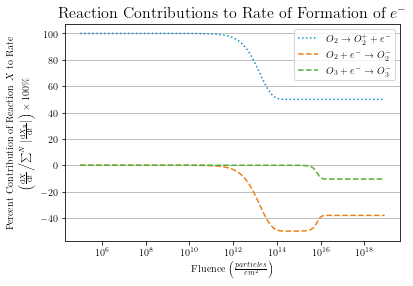

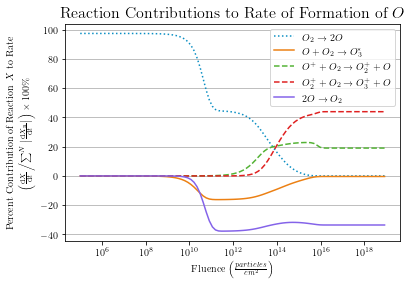

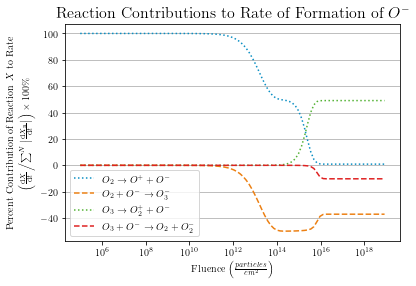

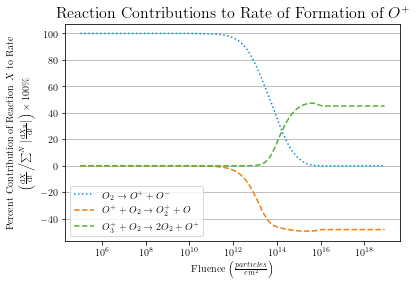

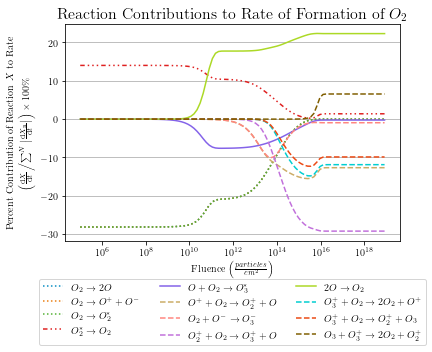

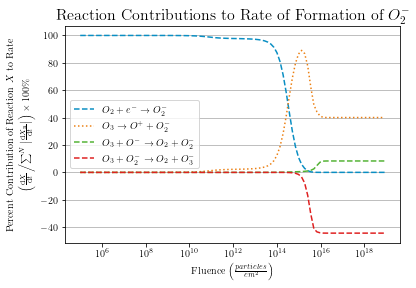

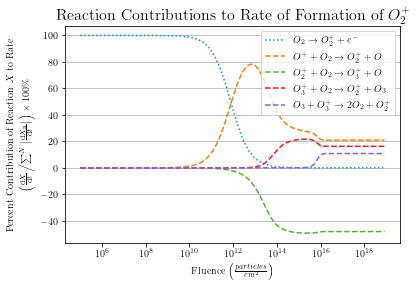

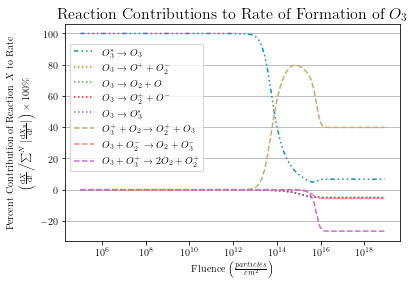

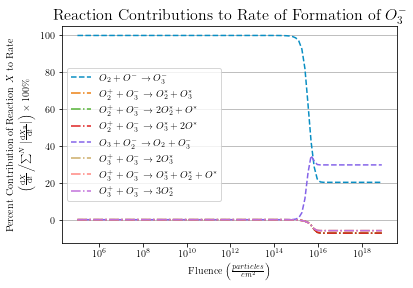

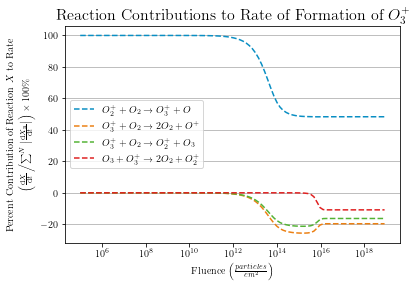

In [8]:
# Load in data
spc_list = ['be-', 'bO', 'bO-', 'bO+', 'bO2', 'bO2-', 'bO2+', 'bO3', 'bO3-', 'bO3+']
spc_label = [r'$e^-$', r'$O$', r'$O^-$', r'$O^+$', r'$O_2$', r'$O_2^-$', r'$O_2^+$', r'$O_3$', r'$O_3^-$', r'$O_3^+$']
flux = 2.33e14 # particles/cm^2 s This is not confirmed!

i=0
while i < len(spc_list) :
    rxn_data = pd.read_pickle(w_ions_version + '/pickle_dataframes/' + spc_list[i]+'_rxn_dataframe.pkl')
    # Get list of reaction numbers
    rxn_list = rxn_data.columns.values.tolist()
    rxn_list.pop(0)
    
    rxn_data["Fluence"] = rxn_data["Fluence"] * flux
    
    # Create figure
    #fig = plt.figure(figsize=[12.8, 9.6])
    
    # Add the data
    j=0
    while j < len(rxn_list) :
        if Rxn_label.loc[rxn_list[j],'Type'] == 1:
            style = '--'
        elif Rxn_label.loc[rxn_list[j],'Type'] == 2:
            style = '-.'
        elif Rxn_label.loc[rxn_list[j],'Type'] == 3:
            style = ':'
        elif Rxn_label.loc[rxn_list[j],'Type'] == 4:
            style = (0, (3, 2, 1, 2, 1, 2, 1, 2))
        else:
            style = '-'
        
        if j == 0: # Plot each reaction with the appropriate label
            ax = rxn_data.plot(x = 'Fluence', \
                               y = rxn_list[j], \
                               linestyle = style, \
                               label = Rxn_label.loc[rxn_list[j],'Label'])
        else:
            rxn_data.plot(ax = ax, \
                          x = 'Fluence', \
                          y = rxn_list[j], \
                          linestyle = style, \
                          label = Rxn_label.loc[rxn_list[j],'Label'])
        j += 1
        
    if spc_list[i] == 'bO2' :
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # To the right of the plot
        plt.legend(ncol= 3, loc='upper center', bbox_to_anchor=(.5, -.15)) # Below the plot
    
    if spc_list[i] == 'bO3' :
        plt.legend(loc='best', bbox_to_anchor=(0, 0.3, 0.5, 0.5))
        
#     if len(rxn_list) > 10 : 
#         plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     else:
#         plt.legend(loc='best')

    # Add plot elements
    #plt.yscale("log")
    plt.xscale("log")
    
    #plt.axhline(y=0, color='k', linewidth = .5)
    #plt.axvline(x=1.5e15, color='k', linewidth = .5)
    plt.grid(True, axis='y')
       
#     plt.xlim([1e10,1e18])
#     #plt.ylim([-50, 50])
    
    #plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel(r'Fluence $\left( \frac{particles}{cm^2} \right)$')
    plt.ylabel(r'Percent Contribution of Reaction $X$ to Rate' 
               '\n'
               r'$\left(\frac{\mathrm{d}X}{\mathrm{d}t} \middle/ \sum^N \left| \frac{\mathrm{d}X_\mathrm{n}}{\mathrm{d}t}\right| \right) \times 100\%$', 
               multialignment='center')
    plt.title(r'Reaction Contributions to Rate of Formation of ' + spc_label[i], fontsize=16)
    
    # Save plot
    # plt.savefig(w_ions_version + '/figures/' + spc_list[i] + '_rxn_contribution.png', bbox_inches='tight')
    # plt.savefig(w_ions_version + '/figures/' + spc_list[i] + '_rxn_contribution.pgf', bbox_inches='tight')
    # plt.savefig(w_ions_version + '/figures/' + spc_list[i] + '_rxn_contribution.eps', bbox_inches='tight')
    plt.show()
    
    i += 1

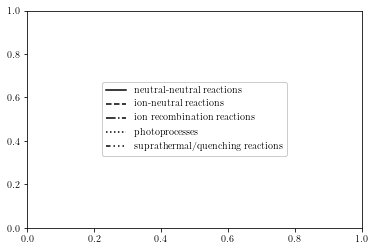

In [11]:
# Creates a legend of the line styles (I am sure there is a better way of doing this)

from matplotlib.lines import Line2D

fig, ax = plt.subplots()
# 0 = Neutral-Neutral reactions
# 1 = ion-neutral reactions
# 2 = ion recombination reactions
# 3 = photoprocesses
# 4 = suprathermal/quenching

legend_elements = [Line2D([0], [0], color='k', ls='-', label= 'neutral-neutral reactions'),
                   Line2D([0], [0], color='k', ls='--', label= 'ion-neutral reactions'),
                   Line2D([0], [0], color='k', ls='-.', label= 'ion recombination reactions'),
                   Line2D([0], [0], color='k', ls=':', label= 'photoprocesses'),
                   Line2D([0], [0], color='k', ls=(0, (3, 2, 1, 2, 1, 2, 1, 2)), label= 'suprathermal/quenching reactions')]

legend = ax.legend(handles=legend_elements, loc='center', framealpha=1, frameon=True)

def export_legend(legend, filename=w_ions_version + '/figures/legend.pgf', expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)